In [196]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

leveldb = pd.read_csv('../stbench_eval_out/leveldb/stats.csv')
for row in leveldb.loc[:,['time', 'state']].iterrows():
    print(str(row[0]) + ":" + row[1][1])
#     print(str(row[0]) + ': ' + str(row[1]))



0:recover
1:recover
2:recover
3:recover
4:recover
5:recover
6:recover
7:recover
8:recover
9:recover
10:recover
11:recover
12:recover
13:recover
14:recover
15:recover
16:recover
17:recover
18:recover
19:recover
20:recover
21:recover
22:recover
23:recover
24:recover
25:recover
26:recover
27:recover
28:recover
29:recover
30:recover
31:recover
32:recover
33:recover
34:recover
35:recover
36:recover
37:recover
38:recover
39:recover
40:recover
41:recover
42:recover
43:recover
44:recover
45:recover
46:recover
47:recover
48:recover
49:recover
50:recover
51:recover
52:recover
53:recover
54:recover
55:recover
56:recover
57:recover
58:recover
59:recover
60:recover
61:recover
62:recover
63:recover
64:recover
65:recover
66:recover
67:recover
68:recover
69:recover
70:recover
71:recover
72:recover
73:recover
74:recover
75:recover
76:recover
77:recover
78:recover
79:recover
80:recover
81:recover
82:recover
83:recover
84:recover
85:recover
86:recover
87:recover
88:recover
89:recover
90:recover
91:recove

In [198]:


states = {}

prevState = ""
for index, row in leveldb.iterrows():
    state = row['state']
    time = row['time']
    if state not in states:
        states[state] = []
    
    stateList = states[state]

    
    # state did not change, just change the end-time of the last item
    if prevState == state:
        stateList[-1][1] = time
    else:
        # state changed, create a new block
        stateList.append([time, time])
        
    prevState = state
    
    

{'recover': [[1, 125]], 'commit': [[126, 297]], 'running': [[298, 357]]}


Text(0.5, 169.64687782805424, 'Disk & Files')

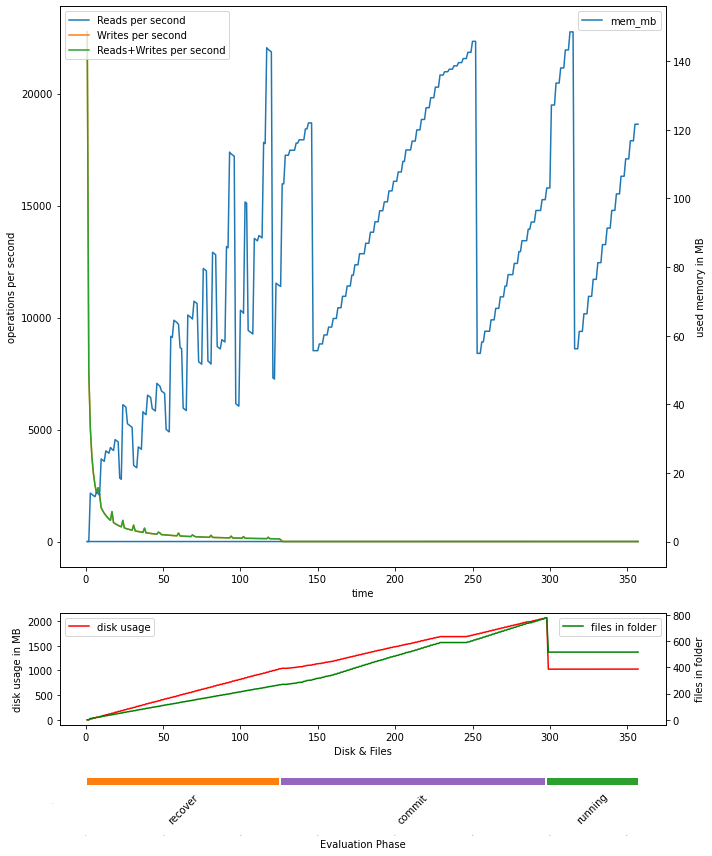

In [205]:
fig, (ax, diskAx, stateAx) = plt.subplots(3, figsize=(10,12),  gridspec_kw={'height_ratios': [20,4,2]})
memAx = ax.twinx()

leveldb['mem_mb'] = leveldb['mem'] / (1024*1024)

colors = {'open':'blue',
          'recover':'orange',
          'reopen':'olive',
          'running':'green',
          'commit':'purple',
          'close':'gray',
         }
         

stateList = [] 
colorList = [] 
stateLabelList = [] 

for state, stateSlots in states.items():
    for s in stateSlots:
        stateList.append([s[0], s[1]-s[0]])
        colorList.append("tab:"+colors.get(state, 'red'))
        stateLabelList.append(state)
       
    

ax.set_xlabel('time')
ax.set_ylabel('operations per second')
memAx.set_ylabel('used memory in MB')

leveldb.plot(x='time', y=['reads', 'writes', 'total'], ax=ax, label=["Reads per second","Writes per second", "Reads+Writes per second"])
leveldb.plot(x='time', y='mem_mb', ax=memAx)
ax.legend(loc='upper left')
memAx.legend(loc='upper right')

stateAx.set_ylim(0,16)
stateAx.set_xlabel('Evaluation Phase')
stateAx.set_yticks([7])
stateAx.tick_params('both', width=0,labelsize=0)
stateAx.broken_barh(stateList, [12,2], facecolors=colorList)

for pos in ['left', 'right', 'top', 'bottom']:
    stateAx.spines[pos].set_visible(False)

fig.tight_layout()

for i, state  in enumerate(stateList):
    stateAx.text(x=state[0] + state[1]/2.0, ha="center", y=1, rotation=45, s=stateLabelList[i])

fileAx = diskAx.twinx()


leveldb['disk_mb'] = leveldb['disk'] / (1024*1024)

leveldb.plot(x='time', y='files', ax=fileAx, color="green", label="files in folder")
leveldb.plot(x='time', y='disk_mb', ax=diskAx, color="red", label="disk usage")
fileAx.legend(loc='upper right')
fileAx.set_ylabel('files in folder')
diskAx.set_ylabel('disk usage in MB')
diskAx.legend(loc='upper left')
diskAx.set_xlabel("Disk & Files")
    